介绍一些概率论知识的使用代码

In [2]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l


从概率分布中抽样  
多项分布multinomial：出现的结果是离散的，每个结果都有对应的概率  
传入一个概率向量，输出是另一个相同长度的向量：它在索引处的值是采样结果中出现的次数  

In [ ]:
fair_probs = torch.ones([5]) / 5
frequency=multinomial.Multinomial(800, fair_probs).sample()#一次抽样800个
prob=frequency/frequency.sum()
print(frequency,'\n',prob)

tensor([156., 183., 142., 164., 155.]) 
 tensor([0.1950, 0.2288, 0.1775, 0.2050, 0.1937])


进行500组实验，每组抽取10个样本

2 torch.Size([500, 5])
torch.Size([500, 5])


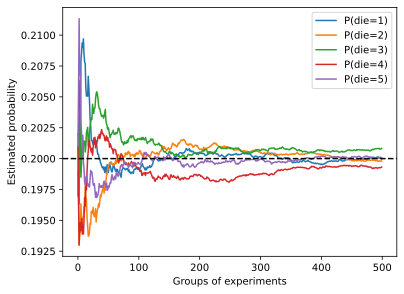

In [25]:
#进行500次抽样，每次抽样取出1000个样本，统计出现的频率
counts = multinomial.Multinomial(1000, fair_probs).sample((500,))
print(counts.ndim,counts.shape)
cum_counts = counts.cumsum(dim=0)
print(cum_counts.shape)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(5):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.2, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();